<a href="https://colab.research.google.com/github/byrcewang/DL_SS2H/blob/main/PyTorch_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing()

# Split the data into features and target (prices)
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [2]:
# Load the California housing dataset
data = fetch_california_housing()

# Split the data into features and target (prices)
X = data.data
y = data.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # 2 layers, 32 units in the hidden layer
        self.fc2 = nn.Linear(32, 1)  # Output layer with 1 unit

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

In [4]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch [10/10], Loss: 1.6003005504608154


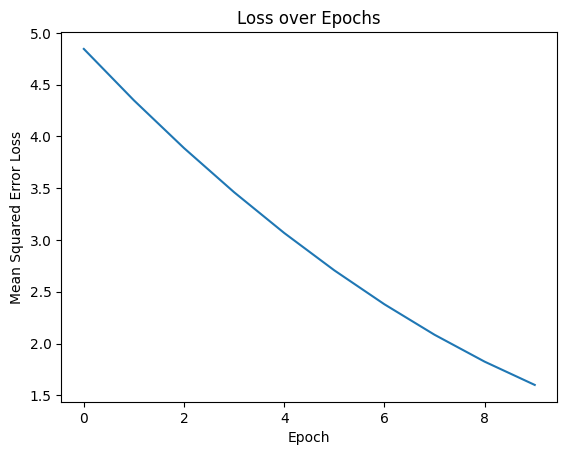

In [5]:
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss for visualization
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')

# Visualize the loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error Loss')
plt.title('Loss over Epochs')
plt.show()

Epoch [10/100], Loss: 0.9289132952690125, MAE: 0.7633215188980103
Epoch [20/100], Loss: 0.7181018590927124, MAE: 0.6215982437133789
Epoch [30/100], Loss: 0.6325912475585938, MAE: 0.5554266571998596
Epoch [40/100], Loss: 0.5605997443199158, MAE: 0.5434503555297852
Epoch [50/100], Loss: 0.5135973691940308, MAE: 0.5221063494682312
Epoch [60/100], Loss: 0.4797855019569397, MAE: 0.4913545548915863
Epoch [70/100], Loss: 0.4562085270881653, MAE: 0.48458972573280334
Epoch [80/100], Loss: 0.4408326745033264, MAE: 0.47445541620254517
Epoch [90/100], Loss: 0.4303508400917053, MAE: 0.46806296706199646
Epoch [100/100], Loss: 0.42241185903549194, MAE: 0.46375083923339844


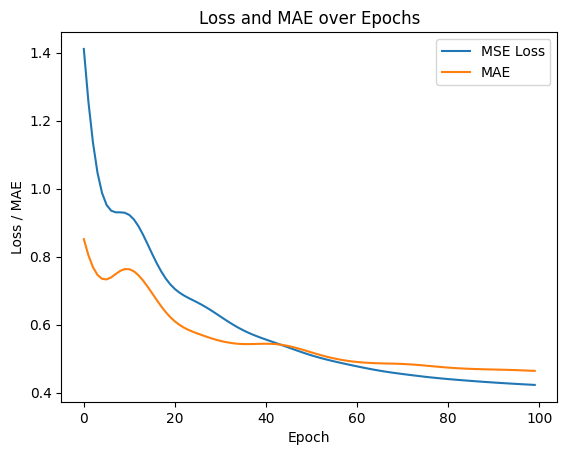

In [6]:
from sklearn.metrics import mean_absolute_error
num_epochs = 100
losses = []
mae_values = []  # Store Mean Absolute Error values

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Compute MAE
    mae = mean_absolute_error(y_train, outputs.detach().numpy())
    mae_values.append(mae)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store the loss for visualization
    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}, MAE: {mae}')

# Visualize the loss
plt.plot(losses, label='MSE Loss')
plt.plot(mae_values, label='MAE')
plt.xlabel('Epoch')
plt.ylabel('Loss / MAE')
plt.title('Loss and MAE over Epochs')
plt.legend()
plt.show()

Epoch [10/100], Loss: 3.2654, MAE: 1.3977
Epoch [20/100], Loss: 2.1840, MAE: 1.0814
Epoch [30/100], Loss: 1.6316, MAE: 0.9260
Epoch [40/100], Loss: 1.3062, MAE: 0.8321
Epoch [50/100], Loss: 1.1025, MAE: 0.7720
Epoch [60/100], Loss: 0.9747, MAE: 0.7318
Epoch [70/100], Loss: 0.8972, MAE: 0.7047
Epoch [80/100], Loss: 0.8490, MAE: 0.6868
Epoch [90/100], Loss: 0.8173, MAE: 0.6744
Epoch [100/100], Loss: 0.7951, MAE: 0.6656


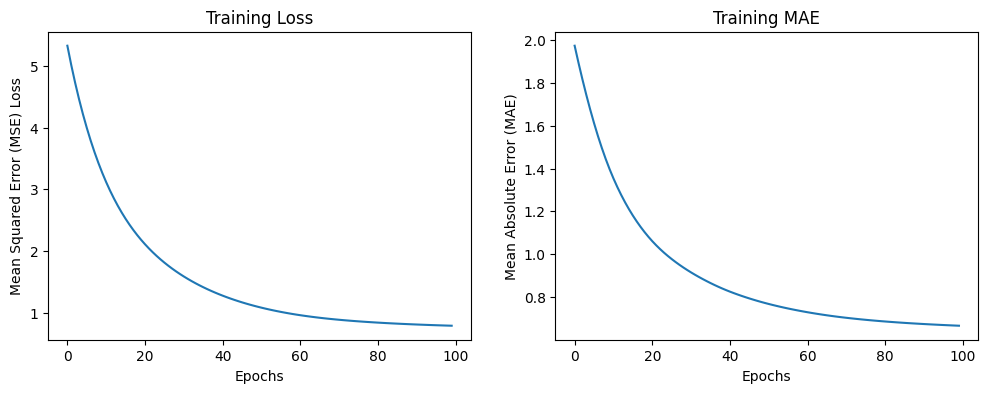

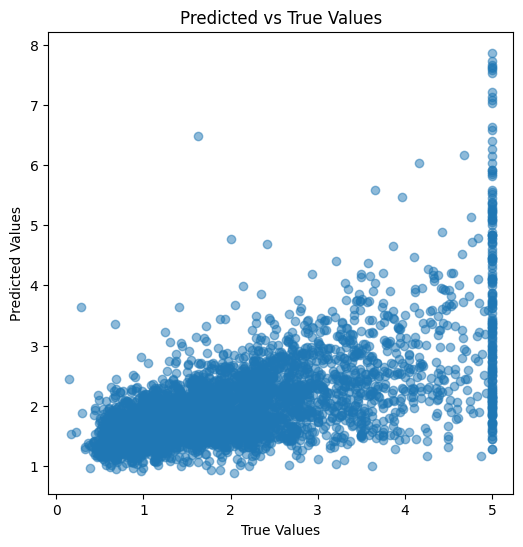

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the 2-layer neural network model
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)  # First hidden layer
        self.fc2 = nn.Linear(16, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

# Define the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 100
losses = []
mae = []
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Calculate MAE
    mae_loss = torch.mean(torch.abs(outputs - y_train))
    losses.append(loss.item())
    mae.append(mae_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, MAE: {mae_loss.item():.4f}')

# Visualize the loss and MAE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), mae)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training MAE')

plt.show()

# Predict using the test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Visualize predicted values vs true label values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')

# Show the plot
plt.show()

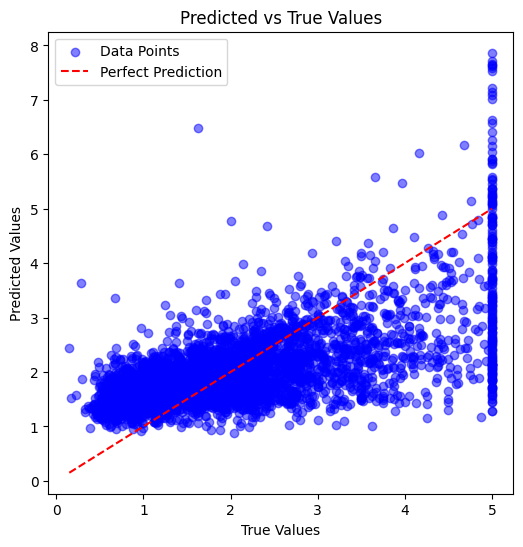

In [8]:
# Predict using the test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

# Visualize predicted values vs true label values in different colors
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Data Points', color='b', marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.legend()

# Show the plot
plt.show()

In [14]:
import pandas as pd
pd.DataFrame(y_test).describe()

,0
count,4128.000000
mean,2.055003
std,1.144870
min,0.149990
25%,1.192750
50%,1.786500
75%,2.630000
max,5.000010


In [16]:
# Load the California housing dataset
data = fetch_california_housing()

# Split the data into features and target (prices)
X = data.data
y = data.target

y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])